In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [35]:
df = pd.read_csv('../Datasets/Digit Recognition/train.csv')
df_test = pd.read_csv('../Datasets/Digit Recognition/test.csv')
df.shape,df_test.shape

((42000, 785), (28000, 784))

In [6]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X = df.drop('label',axis = 1) #contains the pixels of each image
y = df['label'] #contains the numbers from 0 to 9

In [8]:
X.shape

(42000, 784)

In [9]:
y.shape

(42000,)

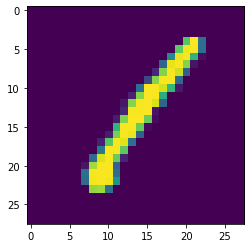

In [18]:
# to convert 1st image into 28 by 28 array and divided by 255 to do normalization using min-max scaling directly as 255 is the max value pixel can have
image0 = X.iloc[0,:].values.reshape(28,28)/255
plt.imshow(image0)

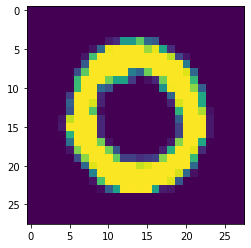

In [19]:
image1 = X.iloc[1,:].values.reshape(28,28)/255
plt.imshow(image1)

In [29]:
def show_digit(X,index):
    image = X.iloc[index,:].values.reshape(28,28)/255
    plt.imshow(image)

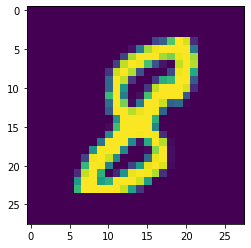

In [32]:
show_digit(X,512)

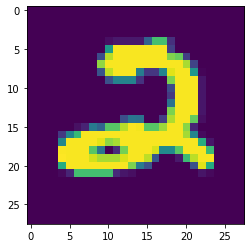

In [36]:
show_digit(df_test,0)

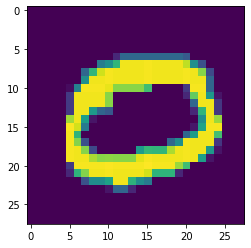

In [37]:
show_digit(df_test,1)

In [40]:
from tensorflow.keras.utils import to_categorical

In [43]:
y_train = to_categorical(y,num_classes=10)
y_train.shape

(42000, 10)

In [44]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# Model Building

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [49]:
model = Sequential()
model.add(Dense(16,activation='relu',input_shape=(784,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))  # output is based on probability based
model.compile(loss='categorical_crossentropy')

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                12560     
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [51]:
X = X/255

In [54]:
model.fit(X,y_train,epochs = 20,batch_size = 64)

Epoch 1/20
657/657 [==============================] - 2s 3ms/step - loss: 0.1546
Epoch 2/20
657/657 [==============================] - 2s 2ms/step - loss: 0.1502
Epoch 3/20
657/657 [==============================] - 3s 4ms/step - loss: 0.1461
Epoch 4/20
657/657 [==============================] - 2s 2ms/step - loss: 0.1423
Epoch 5/20
657/657 [==============================] - 2s 2ms/step - loss: 0.1399
Epoch 6/20
657/657 [==============================] - 2s 2ms/step - loss: 0.1370
Epoch 7/20
657/657 [==============================] - 1s 2ms/step - loss: 0.1341
Epoch 8/20
657/657 [==============================] - 1s 2ms/step - loss: 0.1318
Epoch 9/20
657/657 [==============================] - 1s 2ms/step - loss: 0.1297
Epoch 10/20
657/657 [==============================] - 2s 2ms/step - loss: 0.1275
Epoch 11/20
657/657 [==============================] - 1s 2ms/step - loss: 0.1246
Epoch 12/20
657/657 [==============================] - 2s 3ms/step - loss: 0.1227
Epoch 13/20
657/657 [====

In [61]:
q = df_test.iloc[1].values.reshape(1,784)/255
model.predict(q).argmax()

0

In [62]:
def predict_digit(index):
    q = df_test.iloc[index].values.reshape(1,784)/255
    return model.predict(q).argmax()

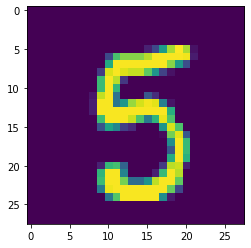

In [71]:
show_digit(df_test,10)

In [70]:
predict_digit(103)

0

# Activation functions

## for output layers we can use following activation functions

#### 1. Regression: Linear activation
#### 2. Binary Classification : sigmoid
#### 3. Multiclass classification : softmax

## for Hidden layers we can use following activation functions

#### Relu : 
#### tanh : Fastest
#### Sigmoid : Slowest